<a href="https://colab.research.google.com/github/AC-Sketch/Atividade-DS/blob/main/Atividade_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Série de exercícios para avaliar o conhecimento em aprendizado de máquina.

Conjunto de dados selecionados do Kaggle

em https://www.kaggle.com/claudiodavi/superhero-set/data.

Dois arquivos: super hero powers.csv e heroes information.csv


##André Simões de Carvalho e Freitas



## Questão 1

Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado.

*   Qual algoritmo você escolheu e por quê?
*   Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia de recursos (seleção) que você executou.

## Questão 2

Um dos desafios do clustering é definir o número certo de clusters.

*   Como você escolheu esse número?
*   Como você avalia a qualidade dos clusters finais?

##resposta 1

Algoritmo K-means. É uma escolha comum para tarefas de clusterização devido à sua simplicidade e eficácia. Razões:

*   Simplicidade: O K-Means é relativamente fácil de entender e implementar, o que o torna uma ótima escolha. Ele converge rapidamente e é computacionalmente eficiente.

*   Escalabilidade: O K-Means pode lidar bem com grandes conjuntos de dados, o que é importante pela quantidade de super-heróis e seus atributos.


Recursos e Pré-processamento: Seleção de Recursos: escolha dos atributos para a clusterização. Tratamento de Dados Ausentes: optando por remoção das variáveis e atributos com valores ausentes.

## resposta 2

O número de clusters foi através do Método Elbow, método do cotovelo e a avaliação através da análise gráfica, a indicação pelo método foi 6


In [ ]:
# importar biblioteca
import pandas as pd

In [ ]:
# ler o primeiro arquivo
df = pd.read_excel("/content/heros-ideal.xlsx")

In [ ]:
# visualizar o dataset
df.head(3)

,hero_names,Gender,Height,Publisher,Alignment,Weight,Super Strength,Stamina,Durability,Super Speed,...,Banish,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force
0,Hellboy,1.0,259.0,1.0,1.0,158.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Alien,1.0,244.0,1.0,0.0,169.0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Predator,1.0,213.0,1.0,0.0,234.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# verificar informações gerais do arquivo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Columns: 163 entries, hero_names to Phoenix Force
dtypes: float64(5), int64(157), object(1)
memory usage: 541.3+ KB


In [ ]:

# Columns to convert
columns_to_convert = ['Gender', 'Height', 'Publisher', 'Alignment', 'Weight']

# Replace NaN and inf values with zeros
df[columns_to_convert] = df[columns_to_convert].fillna(0)

# Convert to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Now you can work with the DataFrame 'df' with integer columns


In [ ]:
concat_df = pd.concat([df.head(), df.tail()])
concat_df

,hero_names,Gender,Height,Publisher,Alignment,Weight,Super Strength,Stamina,Durability,Super Speed,...,Banish,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force
0,Hellboy,1,259,1,1,158,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Alien,1,244,1,0,169,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Predator,1,213,1,0,234,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Mr Incredible,1,201,1,1,158,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Abe Sapien,1,191,1,1,65,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
420,Chromos,1,185,8,0,86,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
421,Master Brood,1,183,8,1,81,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,Omniscient,1,180,8,1,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,Valerie Hart,0,175,8,1,56,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
424,NaN,0,0,0,0,0,248,206,184,181,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
# visualizar o número de linhas e colunas do 'df'
df.shape

(425, 163)

In [ ]:
# importar biblioteca numpy
import numpy as np

In [ ]:
# importar as bibliotecas matplotlib e seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''importar o programa 'KMeans' e parte da biblioteca sklearn, 'TSNE'
'TSNE' refere-se à técnica de redução de dimensionalidade
útil para entender a estrutura e os padrões dos dados'''
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

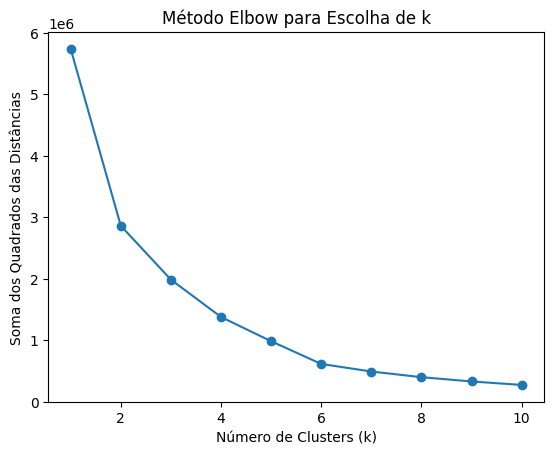

In [ ]:
# Lista de valores de k para testar
k_values = range(1, 11)
inertia = []

# k-means para cada valor de k e a soma dos quadrados das distâncias
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop('hero_names', axis=1))
    inertia.append(kmeans.inertia_)

# gráfico da soma dos quadrados das distâncias em relação ao número de clusters
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Quadrados das Distâncias')
plt.title('Método Elbow para Escolha de k')
plt.show()

In [ ]:
# importar biblioteca para executar função, objetivando encontrar o número ótimo de clusters
'''WCSS significa "Within-Cluster Sum of Squares",
"Soma dos Quadrados Intra-Cluster"
para avaliar a qualidade dos agrupamentos formados

mede a variabilidade dos pontos de dados dentro de cada cluster.
calcula a soma dos quadrados das distâncias euclidianas entre
cada ponto de dados e o centroide (ponto médio)
do cluster ao qual esse ponto pertence.

Quanto menor o valor do WCSS, mais compactos e coesos são os clusters,
o que geralmente é desejado em uma boa clusterização.'''

import math

def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancias = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancias.append(numerador/denominador)

    return distancias.index(max(distancias)) + 2


# Calcular WCSS para diferentes números de clusters
wcss = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.drop('hero_names', axis=1))
    wcss.append(kmeans.inertia_)

# Encontrar o número ótimo de clusters usando a função
numero_otimo = numero_otimo_clusters(wcss)
print("Número ótimo de clusters:", numero_otimo)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número ótimo de clusters: 6


In [ ]:
# imprimir o "número ótimo" de clusters
print(numero_otimo)

6


In [ ]:
# a partir do número de cluster informado, inicia o treinamento do modelo 'fit'
km_model = KMeans(5)
km_model = km_model.fit(df.drop('hero_names',axis=1))


clusters = km_model.predict(df.drop('hero_names',axis=1))
df['Cluster'] = clusters
df[df['Cluster']==0].head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,hero_names,Gender,Height,Publisher,Alignment,Weight,Super Strength,Stamina,Durability,Super Speed,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
4,Abe Sapien,1,191,1,1,65,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,T-1000,1,183,1,0,146,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
6,Elastigirl,0,168,1,1,56,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Buffy,0,157,1,1,52,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,Violet Parr,0,137,1,1,41,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 425 samples in 0.001s...
[t-SNE] Computed neighbors for 425 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 425 / 425
[t-SNE] Mean sigma: 3.940351
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.216293
[t-SNE] KL divergence after 1000 iterations: 0.278826


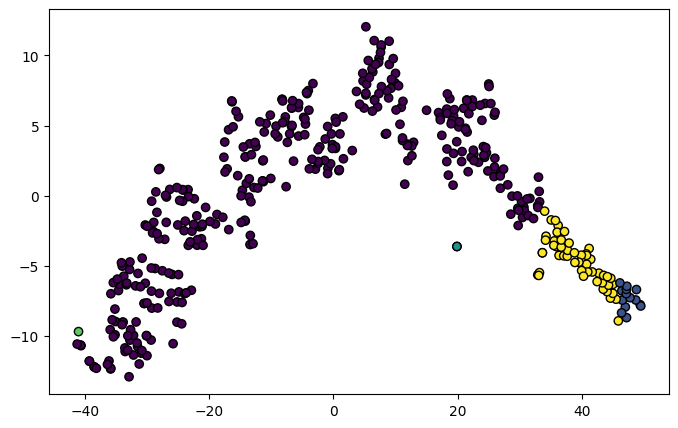

In [ ]:
# gerar uma visualização gráfica dos clusters
np.random.seed(1)
tsne_clusters=TSNE(perplexity=27, verbose=1)
tsne_results=tsne_clusters.fit_transform(df.drop('hero_names', axis=1))
plt.figure(figsize=(8,5))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=km_model.labels_, cmap='viridis', edgecolors='k')
#viridis''cividis''inferno''magma''cubehelix''YlGnBu''BuPu''Greens''Oranges'plasma'

<Axes: ylabel='Cluster'>

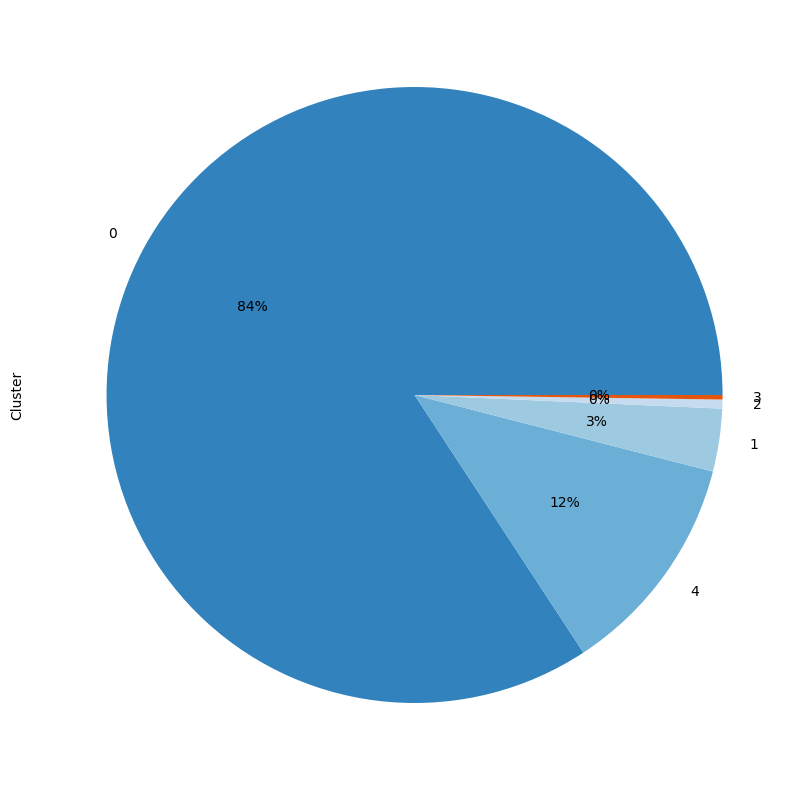

In [ ]:
# gerar gráfico de "pizza" para contribuir na análise gráfica
df['Cluster'].value_counts().plot.pie(figsize=(10,10),autopct='%1.f%%',colors=plt.cm.tab20c.colors)

In [ ]:
# função para mostrar os clusters formados e algumas características
for i in range(df['Cluster'].nunique()):
    print("Cluster no: {}".format(i))

    group_members= df[df['Cluster']==i]
    group_members_count = df[df['Cluster']==i].count()[0]

    print("Representatives: ", end=' ')

    reprs_count=5
    if group_members_count < 5:
        reprs_count = group_members_count

    for j in range(reprs_count):
        print(group_members.iloc[j]['hero_names'], end='; ')
    print('')

    super_powers = df[df['Cluster']==i].drop(['hero_names','Cluster'],axis=1).sum().to_dict()
    super_powers = sorted(super_powers.items(), key=lambda x:x[1], reverse=True)

    print('Most common skills with percentage of occurance:')
    for super_power in super_powers[:5]:
        print(super_power[0] + ' --> ' + format((super_power[1]/group_members_count), '.0%'))
    print('##############################################################################')

Cluster no: 0
Representatives:  Abe Sapien; T-1000; Elastigirl; Buffy; Violet Parr; 
Most common skills with percentage of occurance:
Height --> 17741%
Weight --> 7795%
Publisher --> 401%
Alignment --> 72%
Gender --> 67%
##############################################################################
Cluster no: 1
Representatives:  Giganta; Solomon Grundy; Darkseid; Doomsday; Spawn; 
Most common skills with percentage of occurance:
Weight --> 52229%
Height --> 23543%
Publisher --> 407%
Super Strength --> 100%
Gender --> 79%
##############################################################################
Cluster no: 2
Representatives:  Fin Fang Foom; Groot; 
Most common skills with percentage of occurance:
Height --> 83800%
Weight --> 1100%
Publisher --> 500%
Gender --> 100%
Alignment --> 100%
##############################################################################
Cluster no: 3
Representatives:  
Most common skills with percentage of occurance:
Super Strength --> inf%
Stamina --> inf

<ipython-input-155-e86e0de818c3>:23: RuntimeWarning: divide by zero encountered in long_scalars
  print(super_power[0] + ' --> ' + format((super_power[1]/group_members_count), '.0%'))


## Aprendizagem supervisionada.

Formular uma tarefa de classificação,

o alvo é o alinhamento dos super-heróis (bom ou mau).



## Questão 3

Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.



*   Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?
*   Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?
*   Como você avalia os resultados?



## resposta 3

Ao usar o algoritmo Naive Bayes, principais hipóteses assumidas:

* Independência Condicional: As características (variáveis) são independentes entre si, dado o valor da variável alvo. Isso significa que a presença ou ausência de uma característica não é afetada pelas outras características.

* Ausência de Correlação: Supõe-se que não há correlação entre as características.

* Igual Importância das Características: As características são igualmente importantes.

A Acurácia do modelo foi de 0.7656
Assim, pode-se concluir que o modelo Gaussiano Naive Bayes Classification
está fazendo um trabalho muito bom em prever os rótulos de classe.

In [ ]:
# visualizar o dataframe a ser utilizado
df.head(3)

,hero_names,Gender,Height,Publisher,Alignment,Weight,Super Strength,Stamina,Durability,Super Speed,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
0,Hellboy,1,259,1,1,158,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Alien,1,244,1,0,169,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Predator,1,213,1,0,234,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# importar biblioteca a ser utilizada
from sklearn.model_selection import train_test_split

In [ ]:
# Alguns ajustes necessários no dataframe:
# Nome da coluna que você deseja encontrar a posição (axis)
column_name = 'Alignment'

# Obter a posição (axis) da coluna
column_index = df.columns.get_loc(column_name)

print(f"A coluna '{column_name}' está na posição (axis) {column_index}.")


A coluna 'Alignment' está na posição (axis) 4.


In [ ]:
# Índices das colunas que você deseja trocar
column_index_0 = 0
column_index_4 = 4

# Obter o nome das colunas
columns_list = df.columns.tolist()

# Trocar os nomes das colunas nas posições desejadas
columns_list[column_index_0], columns_list[column_index_4] = columns_list[column_index_4], columns_list[column_index_0]

# Reorganizar as colunas no DataFrame
df1 = df[columns_list]


In [ ]:
# Nome da coluna que você deseja remover
column_to_remove = 'hero_names'

# Remover a coluna
del df1[column_to_remove]


In [ ]:
# quantidade de linhas e colunas
df1.shape

(425, 163)

In [ ]:
# visualizar
df1.head(3)

,Alignment,Gender,Height,Publisher,Weight,Super Strength,Stamina,Durability,Super Speed,Agility,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
0,1,1,259,1,158,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,244,1,169,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,213,1,234,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# importar biblioteca
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
# dividir o conjuntos de dados para treinamento e teste do modelo
X = df1.drop('Alignment',axis=1)
y = df['Alignment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train.shape, X_test.shape

((297, 162), (128, 162))

In [ ]:
# criar um objeto do classificador Naive Bayes Gaussiano
gnb = GaussianNB()

In [ ]:
# treinar o classificador Naive Bayes Gaussiano (gnb) com os conjuntos de treinamento.
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# realizar previsões usando o classificador treinado. O método .predict() é usado para prever as classes
y_pred = gnb.predict(X_test)

In [ ]:
# visualizar a matriz criada
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# importar biblioteca para verificar a acurácia do modelo
from sklearn.metrics import accuracy_score

In [ ]:
# calcular e imprimir a acurácia do modelo teste
print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy: 0.7656


In [ ]:
# gerar a matriz de treinamento
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# gerar e imprimir a acurácia do modelo treinamento
print('Training-set accuracy: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy: 0.6936


In [ ]:
# imprimir as pontuações de desempenho do modelo nos conjuntos de treinamento e teste.
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6936
Test set score: 0.7656


In [ ]:

print('Pontuação do conjunto de treinamento: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Pontuação do conjunto de testes: {:.4f}'.format(gnb.score(X_test, y_test)))

Pontuação do conjunto de treinamento: 0.6936
Pontuação do conjunto de testes: 0.7656


In [ ]:
''' contar a distribuição das classes nos dados de teste (y_test).
Entender como os rótulos estão distribuídos nos dados de teste
e pode fornecer informações sobre o balanceamento das classes.'''

y_test.value_counts()

1    99
0    29
Name: Alignment, dtype: int64

In [ ]:
'''Pode-se ver que a ocorrência de classe mais frequente é 99.
Assim, podemos calcular a precisão nula dividindo 99 pelo número total de ocorrências'''
null_accuracy = (99/(99+29))

print('Null Accuracy score: {0:0.4f}'.format(null_accuracy))

Null Accuracy score: 0.7734


## Questão 4

Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado para essa tarefa.

*  O que motivou sua escolha do algoritmo?
*  Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?

## resposta 4

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado de máquina supervisionado que é usado principalmente para classificação e regressão.

Características:

*  Simplicidade: O KNN é um algoritmo relativamente simples de entender e implementar. Ele não faz suposições complicadas sobre a distribuição dos dados.

*  Não paramétrico: O KNN é um algoritmo não paramétrico,
Isso o torna mais flexível para se ajustar a diferentes tipos de dados.

*  Adaptação a mudanças nos dados: O KNN pode se adaptar a mudanças nos dados sem necessidade de re-treinamento, tornando-o útil em cenários onde os dados estão sujeitos a variações frequentes.

Apresentou uma piora em relação ao modelo Naive Bayes,
saindo de 0.76 de acurácia para 0.66


In [ ]:
# visualizar dataframe a ser utilizado
df1.head(3)

,Alignment,Gender,Height,Publisher,Weight,Super Strength,Stamina,Durability,Super Speed,Agility,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
0,1,1,259,1,158,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,244,1,169,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,213,1,234,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''seria interessante essa visualização,
mas devido o tamanho da matriz, ficou muito pesado'''
import seaborn as sns
#sns.pairplot(df3)

In [ ]:
# dividir o conjuntos de dados para treinamento e teste do modelo
X = df1.drop('Alignment',axis=1)
y = df['Alignment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# quantidade de linhas e colunas treino e teste
X_train.shape, X_test.shape

((297, 162), (128, 162))

In [ ]:
# criar um modelo de classificação utilizando o algoritmo k-vizinhos mais próximos
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# criar uma instância de um modelo K-nearest neighbors (KNN) para classificação
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# treinar um modelo usando conjunto de dados 'treinamento'
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# fazer previsões com um modelo (KNN) treinado em um conjunto de dados de teste.
prediction = knn.predict(X_test)
prediction

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [ ]:
# importar biblioteca para avaliar a qualidade do desempenho do modelo de classificação
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# avaliar a qualidade do desempenho em relação aos dados de teste e suas previsões.
'''calcular e imprimir a matriz de confusão entre as classes reais (verdadeiras)
e as classes previstas por um modelo de classificação'''
print(confusion_matrix(y_test,prediction))

[[12 27]
 [25 64]]


In [ ]:
''' gerar e imprimir um relatório de classificação

y_test: É um vetor contendo os rótulos verdadeiros das classes correspondentes aos exemplos de teste.
prediction: É um vetor contendo as classes previstas pelo modelo para os exemplos de teste.

Precisão (Precision): A proporção de exemplos previstos como positivos que são realmente positivos.
Revocação (Recall): A proporção de exemplos positivos reais que foram previstos corretamente pelo modelo.
F1-Score: É uma métrica que combina precisão e revocação em uma única medida,
calculada como a média harmônica entre essas duas métricas. É útil quando há um desequilíbrio entre as classes.
Suporte (Support): O número total de exemplos verdadeiros para cada classe nos dados de teste.'''

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.32      0.31      0.32        39
           1       0.70      0.72      0.71        89

    accuracy                           0.59       128
   macro avg       0.51      0.51      0.51       128
weighted avg       0.59      0.59      0.59       128



In [ ]:
'''realizar uma busca para encontrar o valor ótimo de k
faz isso avaliando o erro médio para diferentes valores de k
e escolhendo aquele que resulta no menor erro médio.'''

import numpy as np
error_rate = []
K = range(1,15,2)
# Geralmente, tomamos um vizinho k de 1 a 15 (números ímpares)
for i in K:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
 #Determinação do k que gera o mínimo error rate para usar no KNN
n_neighbors = K[error_rate.index(min(error_rate))]

Text(0, 0.5, 'Error Rate')

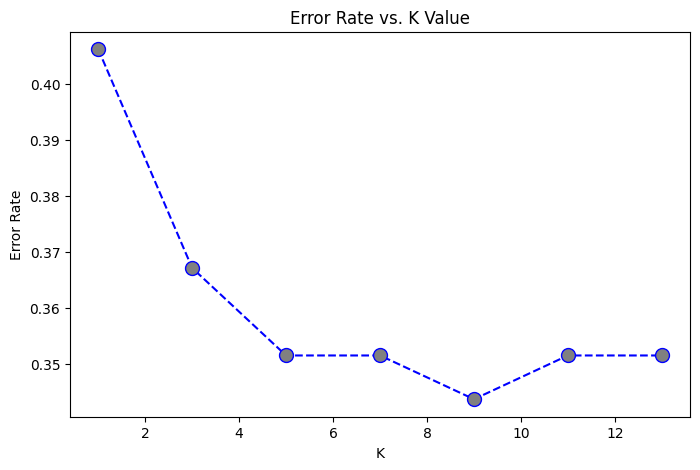

In [ ]:
'''criar um gráfico que representa a relação entre o valor de k
e a taxa de erro médio associada a cada valor de k.
Visualizar como a escolha de diferentes valores de k
afeta o desempenho do algoritmo (KNN) em um problema de classificação.'''

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(range(1,15,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# número ótimo de k
n_neighbors

9

In [ ]:
# rodar novamente o modelo, mas agora com o número ótimo de k
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# realizar as predições, mas com o número ótimo de k
prediction = knn.predict(X_test)
prediction

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
# verificar os resultados para possibilitar comparar com o modelo anterior
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.40      0.26      0.31        39
           1       0.72      0.83      0.77        89

    accuracy                           0.66       128
   macro avg       0.56      0.54      0.54       128
weighted avg       0.62      0.66      0.63       128



In [ ]:
# acurácia saiu de 0.59 para 0.66

## Bônus

Esta seção é para mostrar outros aspectos não explorados. Insights

## Bônus

As Máquinas de Vetores de Suporte (Support Vector Machines - SVM)
são algoritmos de aprendizado de máquina amplamente utilizados para tarefas de classificação e regressão.
Elas são conhecidas por sua capacidade de encontrar hiperplanos de separação ótimos entre classes,
maximizando a margem entre os exemplos de treinamento mais próximos.

Apresentou a acurácia mais intermediária, de 0.71

Naive Bayes: Model accuracy: 0.7656

KNN: 0.66, ajustando k

SVM: 0.71


In [ ]:
df1.head(3)

,Alignment,Gender,Height,Publisher,Weight,Super Strength,Stamina,Durability,Super Speed,Agility,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
0,1,1,259,1,158,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,244,1,169,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,213,1,234,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df1.drop('Alignment',axis=1)
y = df['Alignment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()

In [ ]:
svc_model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = svc_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 4 36]
 [ 1 87]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.10      0.18        40
           1       0.71      0.99      0.82        88

    accuracy                           0.71       128
   macro avg       0.75      0.54      0.50       128
weighted avg       0.74      0.71      0.62       128



In [ ]:
# Melhor acurácia observada, de 0.71

## Questão 5

Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.

*   Qual algoritmo você escolheu e por quê?
*   Como você avalia o desempenho do seu algoritmo neste caso?
*   Quais aspectos desse conjunto de dados apresentam problemas para agrupamento, classificação e regressão? Como você resolveu esses problemas?


## resposta 5


## regressão logistica

Foi utilizado a regressão logística para prever o peso dos super-heróis com base em outros recursos. A regressão logística é um algoritmo de aprendizado de máquina amplamente utilizado para tarefas de classificação binária, mas também pode ser estendido para problemas de regressão.

No entanto, é importante mencionar que a regressão logística tradicional é mais adequada para problemas de classificação binária, onde a variável de saída é categórica. Para problemas de regressão, onde a variável de saída é contínua (como o peso dos super-heróis), é mais comum utilizar algoritmos de regressão linear.


## regressão linear

Após regressão logistica, o método de regressão linear foi experimentado

No geral, os valores do MAE e do MSE fornecem informações
sobre o erro das previsões do seu modelo,
e o valor negativo do R² sugere que pode haver algum erro
ou problema nos cálculos ou na apresentação dos resultados.

In [ ]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# mostrar dados de estatística descritiva do dataframe
df1.describe()

,Alignment,Gender,Height,Publisher,Weight,Super Strength,Stamina,Durability,Super Speed,Agility,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,0.694118,0.694118,185.407059,4.037647,109.296471,1.167059,0.969412,0.865882,0.851765,0.828235,...,0.004706,0.004706,0.004706,0.004706,0.004706,0.004706,0.004706,0.004706,0.004706,1.054118
std,0.461323,0.461323,53.764348,1.522936,98.920096,12.011506,9.981422,8.918043,8.773037,8.531360,...,0.068518,0.068518,0.068518,0.068518,0.068518,0.068518,0.068518,0.068518,0.068518,0.832358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,173.000000,2.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,183.000000,5.000000,81.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,188.000000,5.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,975.000000,8.000000,900.000000,248.000000,206.000000,184.000000,181.000000,176.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [ ]:
# Índices das colunas que você deseja trocar
column_index_0 = 0
column_index_4 = 4

# Obter o nome das colunas
columns_list = df1.columns.tolist()

# Trocar os nomes das colunas nas posições desejadas
columns_list[column_index_0], columns_list[column_index_4] = columns_list[column_index_4], columns_list[column_index_0]

# Reorganizar as colunas no DataFrame
df2 = df1[columns_list]

In [ ]:
# Remover a coluna
coluna_para_remover = 'Weight'

df2 = df2.drop(coluna_para_remover, axis=1)


In [ ]:
df2.head(3)

,Gender,Height,Publisher,Alignment,Super Strength,Stamina,Durability,Super Speed,Agility,Flight,...,Hair Manipulation,Omnipotent,Changing Armor,Biokinesis,Melting,Terrakinesis,Vitakinesis,Speed Force,Phoenix Force,Cluster
0,1,259,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,244,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,213,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


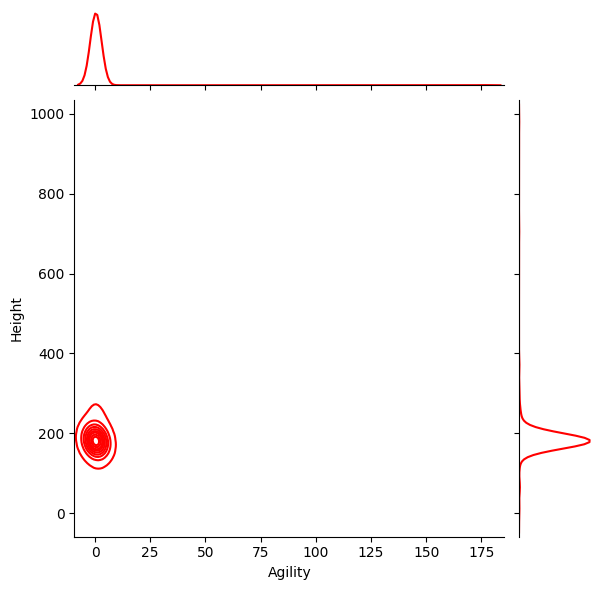

In [ ]:
# gerar outra visualização de comparação de 'Agility' e 'Height'
sns.jointplot(x='Agility',y='Height',data=df2,color='red',kind='kde');

In [ ]:
# dividir o dataframe em variáveis de entrada X e de saída y
# gerar uma regressão para prever 'Weight' com quatro elementos 'características'
X = df2
y = df['Weight']

In [ ]:
'''dividir o conjunto de dados em conjuntos de treinamento e teste.
X: A matriz de características ou variáveis independentes (entrada) dos dados.
y: O vetor de rótulos ou variável dependente (saída) correspondente aos dados.
test_size: A proporção, 33% teste e 67% treinamento.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         4
          52       0.20      0.17      0.18         6
          54       0.18      0.22      0.20         9
          55       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         2
          57       0.00      0.00      0.00         3
          58       0.00      0.00      0.00         1
          59       0.00      0.00      0.00         3
          61       0.00      0.00      0.00         5
          62       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Converter para DataFrame
X = df2
y = df['Weight']

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Criar uma instância do modelo de regressão linear
regressor = LinearRegression()

In [ ]:
# Treinar o modelo nos dados de treinamento
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Coeficientes:", regressor.coef_)
print("Intercept:", regressor.intercept_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Coeficientes: [ 3.87124866e+01  1.76448210e-01  6.71241690e-02 -2.15488865e+01
  4.43522919e+01 -4.71346616e+00  3.79286067e+01 -4.33255519e+01
  3.04254918e+01 -1.39711926e+01 -1.53075539e+00 -4.85333074e+01
 -6.90308052e+00  1.45636990e+01 -3.06935055e+01 -2.41057836e+01
  2.34618225e+01  5.33553082e+01 -3.51880026e+01 -3.02919243e+01
  6.54711015e+01  8.61040450e+00 -3.44549265e+01  4.87166252e+01
  5.08764790e+01  1.01824159e+02 -2.62303743e+01  6.40836802e+00
 -3.71581549e+01  2.64813825e+01  1.40481337e+01 -7.04221486e+00
  3.19453218e+01  5.20848095e+01 -4.61711238e+01  3.47946007e+01
  2.71703460e+01  5.63647915e+01  8.30883409e+00 -2.96038745e+01
 -6.14545878e+01 -2.40504029e+01  2.00069517e+01 -3.77611810e+01
 -2.23229878e+01 -6.22366212e+01 -3.36546430e+01 -6.88572164e+01
 -5.41941853e+01  3.94991804e+00  4.77859902e+01 -7.86494166e+01
  1.09395923e+02 -1.62639698e+01 -1.70141489e+01 -3.82847568e+01
  1.20922409e+01  8.25100956e+00  1.88147662e+01  8.07991708e+01
 -3.1448034

In [ ]:
'''Intercepto: -29.66603412440942
O intercepto é um termo constante em um modelo de regressão linear.
Ele representa o valor da variável dependente quando todas as variáveis independentes
são definidas como zero. Neste caso, o intercepto é -29.66603412440942,
o que significa que, quando todas as outras variáveis preditoras são zero,
o valor previsto da variável dependente é -29.66603412440942.

Erro Médio Quadrático (EMQ): 62817.75455941804
O Erro Médio Quadrático é uma medida da média dos quadrados das diferenças
entre os valores observados reais e os valores previstos produzidos pelo modelo de regressão.
Um EMQ menor indica um melhor ajuste do modelo aos dados.
o EMQ é 62817.75455941804, o que sugere que, em média,
a diferença quadrada entre os valores reais e previstos é relativamente alta.

Pontuação R2 (R-quadrado): -12.549817900646147
A pontuação R2, também conhecida como coeficiente de determinação,
é uma medida que indica a proporção da variância na variável dependente
que é explicada pelas variáveis independentes no modelo. Ela varia de 0 a 1,
sendo que valores mais altos indicam um ajuste melhor.
No entanto, um valor de R-quadrado negativo como -12.549817900646147
não é possível em uma análise de regressão válida.
O R-quadrado deve estar sempre entre 0 e 1,
em que 0 significa que o modelo não explica nenhuma da variância
e 1 significa que ele explica toda a variância.
É possível que possa haver um erro ou problema no cálculo ou na apresentação do valor de R-quadrado.

Resumindo, o valor do intercepto e do EMQ fazem sentido no contexto da análise de regressão,
mas o valor negativo do R-quadrado provavelmente é um erro.'''

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir o relatório de avaliação
print("Relatório de Avaliação:")
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Relatório de Avaliação:
Erro Médio Absoluto (MAE): 146.98
Erro Quadrático Médio (MSE): 62817.75
Coeficiente de Determinação (R²): -12.55


In [ ]:
'''Erro Médio Absoluto (MAE): 146.98
O Erro Médio Absoluto é a média das diferenças absolutas entre os valores reais
e os valores previstos pelo modelo de regressão.
Quanto menor o valor do MAE, melhor o ajuste do modelo aos dados.
o MAE é 146.98, o que significa que, em média,
as previsões do modelo têm uma diferença absoluta
de aproximadamente 146.98 unidades em relação aos valores reais.

Erro Quadrático Médio (MSE): 62817.75
O Erro Quadrático Médio é a média dos quadrados das diferenças
entre os valores reais e os valores previstos pelo modelo.
Ele fornece uma ideia de quão bem as previsões do modelo se ajustam aos dados.
Um MSE menor indica um melhor ajuste.
o MSE é 62817.75, o que sugere que a média das diferenças quadráticas
entre as previsões e os valores reais é consideravelmente alta.

Coeficiente de Determinação (R²): -12.55
O Coeficiente de Determinação, ou R², é uma medida que varia de 0 a 1
indica a proporção da variância nos valores da variável dependente
que é explicada pelas variáveis independentes do modelo.
No entanto, um valor de R² negativo, como -12.55,
não é possível em uma análise de regressão válida.
O R² sempre deve estar entre 0 e 1.
Um R² de 0 indica que o modelo não explica nada da variância,
enquanto um R² de 1 indica que o modelo explica toda a variância.

No geral, os valores do MAE e do MSE fornecem informações
sobre o erro das previsões do seu modelo,
e o valor negativo do R² sugere que pode haver algum erro
ou problema nos cálculos ou na apresentação dos resultados.'''